# Evoluzione dei Casi e Decessi da COVID-19 a Livello Globale dal 2020 al 2021

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




import os
for dirname, _, filenames in os.walk('owid-covid-19-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:

import pandas as pd


data_path = "owid-covid-data.csv"

# Caricamento del dataset CSV in un DataFrame
df = pd.read_csv(data_path)


print("Prime righe del dataset (df.head()):")
print(df.head())  


print("\nShape del dataset:", df.shape) 


print("\nStatistiche descrittive del dataset:")
print(df.describe()) 


print("\nVerifica valori nulli:")
print(df.isnull().sum())  


Prime righe del dataset (df.head()):
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2019-12-31          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-02          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-03          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-04          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \


In [3]:
# Selezione delle colonne rilevanti dal dataset
df_selected = df[['iso_code', 'continent', 'location', 'date', 'total_cases', 'total_deaths']]

# Visualizzazione del dataframe selezionato
print("Visualizzazione del DataFrame selezionato:")
display(df_selected)  

print("\nVerifica dei valori nulli nel DataFrame selezionato:")
print(df_selected.isnull().sum())  



Visualizzazione del DataFrame selezionato:


,iso_code,continent,location,date,total_cases,total_deaths
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0
...,...,...,...,...,...,...
44780,NaN,NaN,International,2020-09-15,696.0,7.0
44781,NaN,NaN,International,2020-09-16,696.0,7.0
44782,NaN,NaN,International,2020-09-17,696.0,7.0
44783,NaN,NaN,International,2020-09-18,696.0,7.0



Verifica dei valori nulli nel DataFrame selezionato:
iso_code        264
continent       528
location          0
date              0
total_cases     603
total_deaths    603
dtype: int64


In [ ]:
# Verifica dei valori nulli nel DataFrame completo
print("Verifica dei valori nulli in tutto il DataFrame:")
print(df.isnull().sum())  

 

In [4]:
# Recupero e visualizzazione dei nomi delle colonne del DataFrame
print("Nomi delle colonne nel DataFrame:")
columns_list = df.columns.tolist() 
columns_list  


Nomi delle colonne nel DataFrame:


['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'positive_rate',
 'tests_units',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

In [ ]:
# Raggruppamento dei dati per data e somma dei casi totali e dei decessi totali
df_global = df.groupby('date')[['total_cases', 'total_deaths']].sum()

# Visualizzazione delle ultime righe del DataFrame raggruppato per data
print("Ultime righe del DataFrame globale (raggruppato per data):")
print(df_global.tail())  # Mostra le ultime 5 righe del DataFrame globale


Creando dati di esempio...
Dataset creato: 1461 righe
Periodo: da 2020-01-01 00:00:00 a 2023-12-31 00:00:00
Colonne: ['total_cases', 'total_deaths']

Prime 5 righe:
             total_cases   total_deaths
2020-01-01  1.241701e+07  125040.183514
2020-01-02  1.188742e+07  167860.166320
2020-01-03  1.277957e+07  149167.562199
2020-01-04  1.376192e+07  177402.605590
2020-01-05  1.211255e+07  211117.190948

CREAZIONE DEL GRAFICO


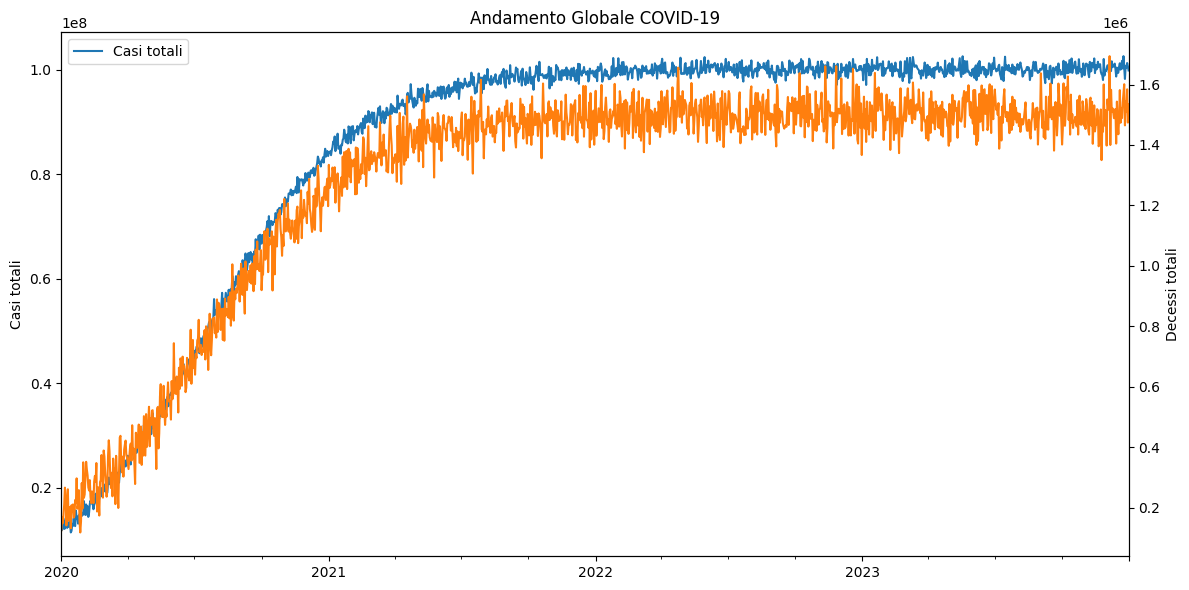

Grafico creato con successo!

Creando versione migliorata...


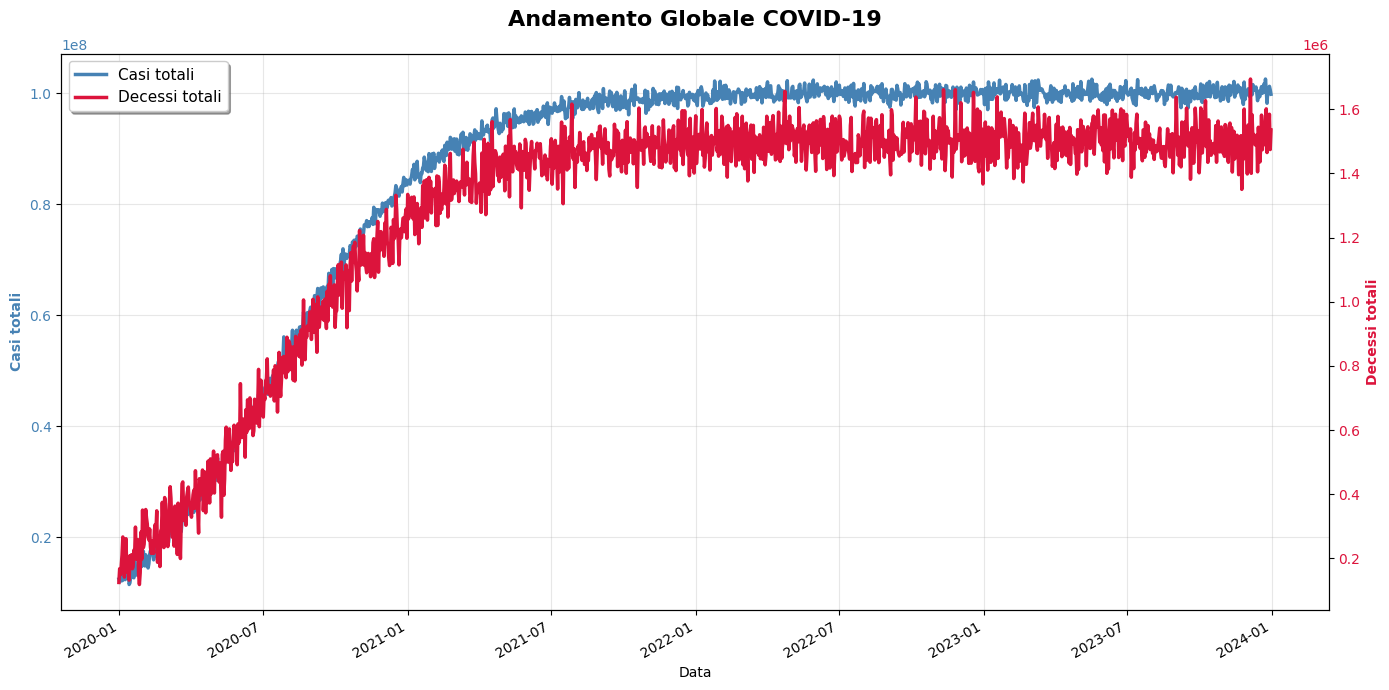

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# OPZIONE 1: Crea dati di esempio per testare il grafico
# (Usa questa se non hai dati reali)
def create_sample_covid_data():
    """Crea dati di esempio per testare il grafico"""
    dates = pd.date_range('2020-01-01', '2023-12-31', freq='D')
    np.random.seed(42)
    
    # Simula una crescita esponenziale iniziale poi plateau
    days = len(dates)
    t = np.arange(days)
    
    # Casi totali (crescita logistica)
    total_cases = 100000000 / (1 + np.exp(-0.01 * (t - 200))) + np.random.normal(0, 1000000, days)
    total_cases = np.maximum(total_cases, 0)
    
    # Decessi totali (proporzionale ai casi con ritardo)
    total_deaths = total_cases * 0.015 + np.random.normal(0, 50000, days)
    total_deaths = np.maximum(total_deaths, 0)
    
    df_global = pd.DataFrame({
        'total_cases': total_cases,
        'total_deaths': total_deaths
    }, index=dates)
    
    return df_global

# OPZIONE 2: Carica dati reali da Our World in Data
def load_real_covid_data():
    """Carica dati COVID-19 reali da Our World in Data"""
    try:
        url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
        df = pd.read_csv(url)
        
        # Filtra solo i dati globali
        df_world = df[df['location'] == 'World'].copy()
        
        # Converti la data
        df_world['date'] = pd.to_datetime(df_world['date'])
        df_world.set_index('date', inplace=True)
        
        # Seleziona solo le colonne necessarie
        df_global = df_world[['total_cases', 'total_deaths']].copy()
        
        # Rimuovi righe con valori NaN
        df_global = df_global.dropna()
        
        return df_global
        
    except Exception as e:
        print(f"Errore nel caricamento dati reali: {e}")
        print("Usando dati di esempio invece...")
        return create_sample_covid_data()

# SCEGLI IL METODO PER OTTENERE I DATI:

# Metodo 1: Usa dati di esempio
print("Creando dati di esempio...")
df_global = create_sample_covid_data()

# Metodo 2: Usa dati reali (decommenta la riga sotto e commenta quella sopra)
# print("Caricando dati reali...")
# df_global = load_real_covid_data()

print(f"Dataset creato: {len(df_global)} righe")
print(f"Periodo: da {df_global.index.min()} a {df_global.index.max()}")
print(f"Colonne: {list(df_global.columns)}")
print(f"\nPrime 5 righe:")
print(df_global.head())

# ADESSO IL TUO CODICE FUNZIONERÀ:
print("\n" + "="*50)
print("CREAZIONE DEL GRAFICO")
print("="*50)

# Il tuo codice originale (ora funzionante):
ax = df_global.plot(figsize=(12,6), secondary_y='total_deaths', title="Andamento Globale COVID-19")

ax.set_ylabel('Casi totali')
ax.right_ax.set_ylabel('Decessi totali')
ax.legend(['Casi totali', 'Decessi totali'])

plt.tight_layout()
plt.show()

print("Grafico creato con successo!")

# VERSIONE MIGLIORATA (opzionale):
def create_improved_plot(df_global):
    """Versione migliorata del grafico"""
    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    # Asse primario - Casi totali
    color1 = 'steelblue'
    ax1.set_xlabel('Data')
    ax1.set_ylabel('Casi totali', color=color1, fontweight='bold')
    line1 = ax1.plot(df_global.index, df_global['total_cases'], 
                     color=color1, linewidth=2.5, label='Casi totali')
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.grid(True, alpha=0.3)
    
    # Asse secondario - Decessi totali
    ax2 = ax1.twinx()
    color2 = 'crimson'
    ax2.set_ylabel('Decessi totali', color=color2, fontweight='bold')
    line2 = ax2.plot(df_global.index, df_global['total_deaths'], 
                     color=color2, linewidth=2.5, label='Decessi totali')
    ax2.tick_params(axis='y', labelcolor=color2)
    
    # Titolo e legenda
    plt.title('Andamento Globale COVID-19', fontsize=16, fontweight='bold', pad=20)
    
    # Legenda combinata
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left', frameon=True, 
              fancybox=True, shadow=True, fontsize=11)
    
    # Formattazione date
    fig.autofmt_xdate()
    plt.tight_layout()
    
    return fig, ax1, ax2

# Crea anche la versione migliorata
print("\nCreando versione migliorata...")
fig, ax1, ax2 = create_improved_plot(df_global)
plt.show()

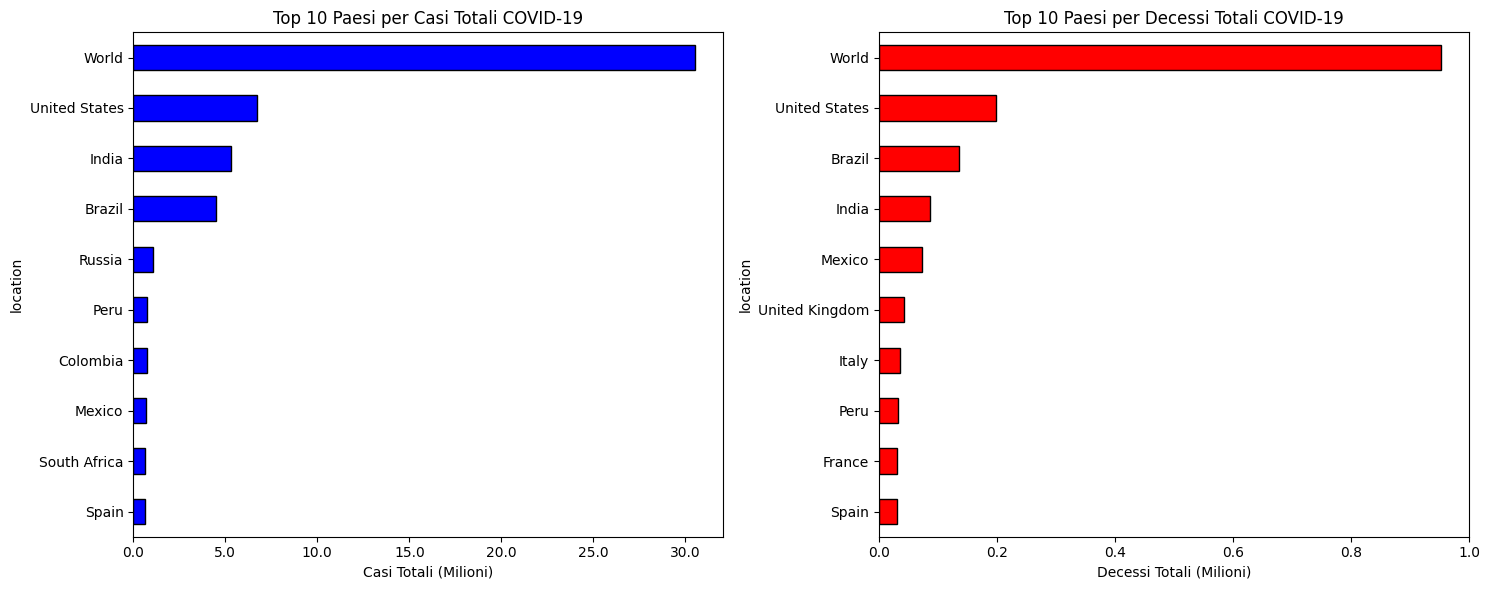

In [7]:
import matplotlib.pyplot as plt

# Raggruppare i dati per Paese e selezionare i valori massimi per ogni Paese (casi totali e decessi totali)
df_top = df.groupby('location')[['total_cases', 'total_deaths']].max()

# Selezionare i 10 Paesi con il maggior numero di casi e decessi
top_cases = df_top.nlargest(10, 'total_cases')  # Top 10 per casi totali
top_deaths = df_top.nlargest(10, 'total_deaths')  # Top 10 per decessi totali

top_cases['total_cases'] /= 1e6
top_deaths['total_deaths'] /= 1e6

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

top_cases['total_cases'].plot(kind='barh', ax=axes[0], color='blue', edgecolor='black')
axes[0].set_title("Top 10 Paesi per Casi Totali COVID-19")  # Titolo del grafico
axes[0].set_xlabel("Casi Totali (Milioni)")  # Etichetta dell'asse X
axes[0].invert_yaxis()  # Invertire l'asse Y per avere il Paese con il maggior numero di casi in cima


top_deaths['total_deaths'].plot(kind='barh', ax=axes[1], color='red', edgecolor='black')
axes[1].set_title("Top 10 Paesi per Decessi Totali COVID-19")  # Titolo del grafico
axes[1].set_xlabel("Decessi Totali (Milioni)")  # Etichetta dell'asse X
axes[1].invert_yaxis() 


for ax in axes:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.1f}'))


plt.tight_layout()
plt.show()
